In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore") 
import joblib

In [2]:
data_title_basics = pd.read_csv('../BD_A_IGNORE/title.basics.tsv.gz', sep='\t', compression='gzip', na_values=(r'\N'))
df_title_ratings = pd.read_csv('../BD_A_IGNORE/title.crew.tsv.gz', sep='\t', compression='gzip', na_values=(r'\N'))
df_title_crew = pd.read_csv('../BD_A_IGNORE/title.ratings.tsv.gz', sep='\t', compression='gzip', na_values=(r'\N'))

# Base "titlebasics, ratings et crew" : merge et nettoyage

In [3]:
data = pd.merge(data_title_basics, df_title_ratings, how='outer', left_on='tconst', right_on='tconst')


In [4]:
data_films = pd.merge(data, df_title_crew, how='outer', left_on='tconst', right_on='tconst')

In [5]:
# combinaison des 3 bases chargées
data_films.head(5)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,NaN,1.0,"Documentary,Short",nm0005690,NaN,5.7,2096.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,NaN,5.0,"Animation,Short",nm0721526,NaN,5.6,282.0
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0.0,1892.0,NaN,5.0,"Animation,Comedy,Romance",nm0721526,NaN,6.5,2115.0
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,NaN,12.0,"Animation,Short",nm0721526,NaN,5.4,182.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,NaN,1.0,"Comedy,Short",nm0005690,NaN,6.2,2845.0


In [6]:
data_films.tail(5)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
11410098,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0.0,2009.0,NaN,NaN,"Action,Drama,Family",nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284",NaN,NaN
11410099,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0.0,2010.0,NaN,NaN,"Action,Drama,Family",nm1485677,"nm9187127,nm1485677,nm9826385,nm1628284",NaN,NaN
11410100,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0.0,2010.0,NaN,NaN,"Action,Drama,Family",nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284",NaN,NaN
11410101,tt9916856,short,The Wind,The Wind,0.0,2015.0,NaN,27,Short,nm10538645,nm6951431,NaN,NaN
11410102,tt9916880,tvEpisode,Horrid Henry Knows It All,Horrid Henry Knows It All,0.0,2014.0,NaN,10,"Adventure,Animation,Comedy",nm0996406,"nm1482639,nm2586970",7.9,9.0


In [7]:
data_films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11410103 entries, 0 to 11410102
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   titleType       object 
 2   primaryTitle    object 
 3   originalTitle   object 
 4   isAdult         float64
 5   startYear       float64
 6   endYear         float64
 7   runtimeMinutes  object 
 8   genres          object 
 9   directors       object 
 10  writers         object 
 11  averageRating   float64
 12  numVotes        float64
dtypes: float64(5), object(8)
memory usage: 1.1+ GB


In [8]:
# vérification des doublons
data_films.duplicated().sum()

0

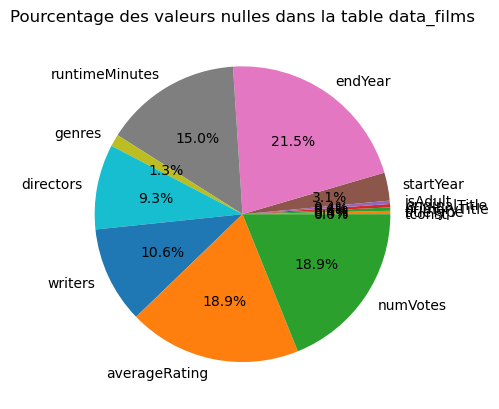

In [9]:
# Part des valeurs nulles de chaque colonne dans le dataframe
import matplotlib.pyplot as plt
null_counts = data_films.isnull().sum()
plt.pie(null_counts, labels=null_counts.index, autopct='%1.1f%%')
plt.title("Pourcentage des valeurs nulles dans la table data_films")
plt.show()

### Colonne par colonne
#### titleType

In [10]:
# avec plus de 20% de valeurs manquantes, la colonne endYear sera supprimée car ne servira pas à notre analyse
data_films = data_films.drop(['endYear'], axis=1)

In [11]:
# check et nettoyage de la colonnes "titletype"
data_films['titleType'].value_counts()

titleType
tvEpisode       8614784
short           1026375
movie            696417
video            300230
tvSeries         272387
tvMovie          148747
tvMiniSeries      57669
tvSpecial         50023
videoGame         40341
tvShort           10459
tvPilot               1
Name: count, dtype: int64

In [12]:
data_films

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,1.0,"Documentary,Short",nm0005690,NaN,5.7,2096.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,5.0,"Animation,Short",nm0721526,NaN,5.6,282.0
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0.0,1892.0,5.0,"Animation,Comedy,Romance",nm0721526,NaN,6.5,2115.0
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,12.0,"Animation,Short",nm0721526,NaN,5.4,182.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,1.0,"Comedy,Short",nm0005690,NaN,6.2,2845.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11410098,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0.0,2009.0,NaN,"Action,Drama,Family",nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284",NaN,NaN
11410099,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0.0,2010.0,NaN,"Action,Drama,Family",nm1485677,"nm9187127,nm1485677,nm9826385,nm1628284",NaN,NaN
11410100,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0.0,2010.0,NaN,"Action,Drama,Family",nm1485677,"nm9187127,nm1485677,nm9826385,nm9299459,nm1628284",NaN,NaN
11410101,tt9916856,short,The Wind,The Wind,0.0,2015.0,27,Short,nm10538645,nm6951431,NaN,NaN


In [13]:
# on ne conservera que les tvseries, short, movie
data_films_new = data_films[(data_films['titleType'] == 'short') | (data_films['titleType'] == 'movie') | (data_films['titleType'] == 'tvSeries')]
data_films_new['titleType'].value_counts()

titleType
short       1026375
movie        696417
tvSeries     272387
Name: count, dtype: int64

In [14]:
data_films_new

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,writers,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0.0,1894.0,1.0,"Documentary,Short",nm0005690,NaN,5.7,2096.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892.0,5.0,"Animation,Short",nm0721526,NaN,5.6,282.0
2,tt0000003,short,Poor Pierrot,Pauvre Pierrot,0.0,1892.0,5.0,"Animation,Comedy,Romance",nm0721526,NaN,6.5,2115.0
3,tt0000004,short,Un bon bock,Un bon bock,0.0,1892.0,12.0,"Animation,Short",nm0721526,NaN,5.4,182.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0.0,1893.0,1.0,"Comedy,Short",nm0005690,NaN,6.2,2845.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11410043,tt9916730,movie,6 Gunn,6 Gunn,0.0,2017.0,116,Drama,nm10538612,nm10538612,7.0,12.0
11410053,tt9916754,movie,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,0.0,2013.0,49,Documentary,"nm9272490,nm8349149","nm8349149,nm9272490",NaN,NaN
11410054,tt9916756,short,Pretty Pretty Black Girl,Pretty Pretty Black Girl,0.0,2019.0,NaN,Short,nm10538639,nm10538639,NaN,NaN
11410058,tt9916764,short,38,38,0.0,2018.0,NaN,Short,nm6685122,"nm6687687,nm10538642,nm9641593,nm10538643",NaN,NaN


#### startYear

In [15]:
# modification du type
data_films_new['startYear'] = pd.to_datetime(data_films_new['startYear'], format='%Y')

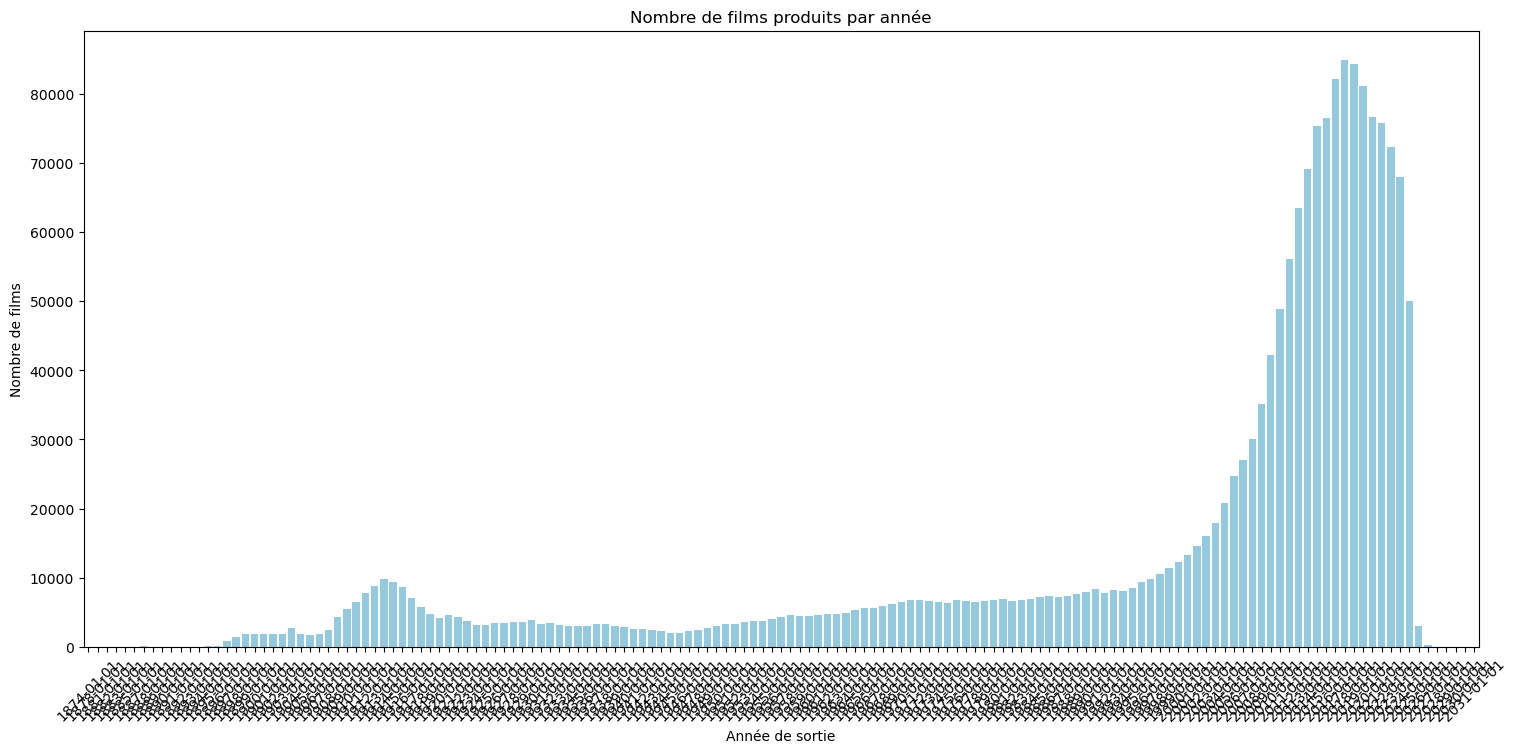

In [16]:
# distribution du nombre de film par année
import seaborn as sns

movie_by_yr = data_films_new['startYear'].dropna().value_counts().sort_index()
plt.figure(figsize=(18, 8))
sns.barplot(x=movie_by_yr.index, y=movie_by_yr.values, color='skyblue')
plt.xlabel('Année de sortie')
plt.xticks(rotation=45)
plt.ylabel('Nombre de films')
plt.title('Nombre de films produits par année')
plt.show()


In [17]:
print(data_films_new['startYear'].min(), data_films_new['startYear'].max())

1874-01-01 00:00:00 2031-01-01 00:00:00


In [18]:
# on ne gardera que les films entre 1900 et 2025
data_films_new = data_films_new[(data_films_new['startYear'] > '1899-12-31') & (data_films_new['startYear'] <= '2025-12-31')]
print(data_films_new['startYear'].min(), data_films_new['startYear'].max())


1900-01-01 00:00:00 2025-01-01 00:00:00


In [19]:
# analyse des films par décennies
def decennie(date):
    date = str(date)
    if date < '1910-01-01':
        return '1910'
    elif date < '1920-01-01':
        return '1910'
    elif date < '1930-01-01':
        return '1920'
    elif date < '1940-01-01':
        return '1930'
    elif date < '1950-01-01':
        return '1940'
    elif date < '1960-01-01':
        return '1950'
    elif date < '1970-01-01':
        return '1960'
    elif date < '1980-01-01':
        return '1970'
    elif date < '1990-01-01':
        return '1980'
    elif date < '2000-01-01':
        return '1990'
    elif date < '2010-01-01':
        return '2000'
    elif date < '2020-01-01':
        return '2010'
    else: 
        return '2020'

data_films_new["periode"] = data_films_new["startYear"].apply(decennie)
data_films_new["periode"] 

159         1910
172         1910
219         1910
264         1910
265         1910
            ... 
11410043    2010
11410053    2010
11410054    2010
11410058    2010
11410101    2010
Name: periode, Length: 1826579, dtype: object

In [20]:
# extraire uniquement l'année pour la date de sortie
data_films_new['startYear'] = data_films_new['startYear'].dt.year
data_films_new['startYear'].value_counts()

startYear
2017    84927
2018    84409
2016    82130
2019    81171
2020    76643
        ...  
1906     1868
1904     1835
1902     1812
1901     1776
1905     1709
Name: count, Length: 126, dtype: int64

#### primaryTitle

In [21]:
# on conservera uniquement "originalTitle" car plus pertinent, donc suppression de "primaryTitle"
data_films_new = data_films_new.drop('primaryTitle', axis=1)

#### Isadult

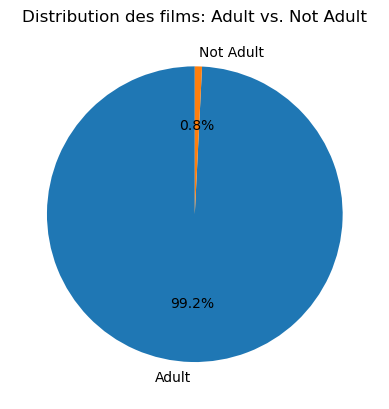

In [22]:
# analyse colonne isadult
data_films_new['isAdult'] = data_films_new['isAdult'].astype('bool')
data_films_new_filter = data_films_new['isAdult'].dropna()
adult_counts = data_films_new_filter.value_counts()
plt.pie(adult_counts, labels=['Adult', 'Not Adult'], autopct='%1.1f%%', startangle=90)
plt.title("Distribution des films: Adult vs. Not Adult")
plt.show()

#### runtimeMinutes

In [23]:
# modifier le type des données
data_films_new['runtimeMinutes'] = data_films_new['runtimeMinutes'].astype('float')

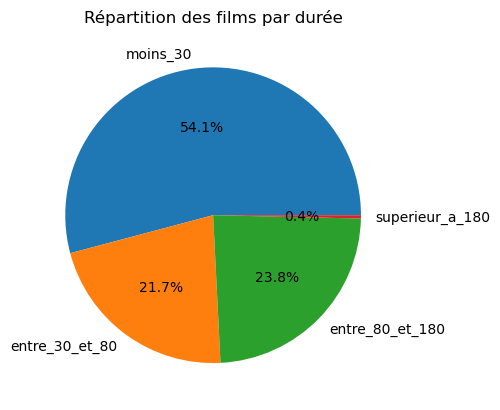

In [24]:
# distribution du nombre de films par durée

moins_30 = data_films_new[data_films_new['runtimeMinutes'] < 30.0]
moins_30.shape[0] #640296

entre_30_et_80 = data_films_new[(data_films_new['runtimeMinutes'] >= 30.0) & (data_films_new['runtimeMinutes'] <= 80.0)]
entre_30_et_80.shape[0] #256198


entre_80_et_180 = data_films_new[(data_films_new['runtimeMinutes'] > 80.0) & (data_films_new['runtimeMinutes'] <= 180.0)]
entre_80_et_180.shape[0] #282016

superieur_a_180 = data_films_new[(data_films_new['runtimeMinutes'] > 180.0)]
superieur_a_180.shape[0] #4241




labels = ['moins_30', 'entre_30_et_80', 'entre_80_et_180', 'superieur_a_180']
values = [640296, 256198, 282016, 4241]

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("Répartition des films par durée")
plt.show();

In [25]:
# suppression des films dont la durée est supérieure à 240
data_films_new = data_films_new[data_films_new['runtimeMinutes'] <= 240.0]
data_films_new['runtimeMinutes'].max()

240.0

#### averageRating & numVotes

In [26]:
# on remplace les valeurs manquantes par les notes  et votes médians
data_films_new['averageRating'].fillna(data_films_new['averageRating'].median(), inplace=True)
data_films_new['numVotes'].fillna(data_films_new['numVotes'].median(), inplace=True)

#### genres

In [27]:
# sans supprimer les films, on va remplacer les genres manquants par la valeur "Unknown"
data_films_new['genres'] = data_films_new["genres"].fillna('Unknown')


In [28]:
data_films_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1180810 entries, 271 to 11410101
Data columns (total 12 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   tconst          1180810 non-null  object 
 1   titleType       1180810 non-null  object 
 2   originalTitle   1180807 non-null  object 
 3   isAdult         1180810 non-null  bool   
 4   startYear       1180810 non-null  int32  
 5   runtimeMinutes  1180810 non-null  float64
 6   genres          1180810 non-null  object 
 7   directors       1126937 non-null  object 
 8   writers         934352 non-null   object 
 9   averageRating   1180810 non-null  float64
 10  numVotes        1180810 non-null  float64
 11  periode         1180810 non-null  object 
dtypes: bool(1), float64(3), int32(1), object(7)
memory usage: 104.7+ MB


# Bases "principals name_basics" : merge et nettoyage

In [29]:
principals = pd.read_csv('../BD_A_IGNORE/title.principals.tsv.gz', sep='\t', compression='gzip', na_values=(r'\N'))
name_basics = pd.read_csv('../BD_A_IGNORE/name.basics.tsv.gz', sep='\t', compression='gzip', na_values=(r'\N'))


In [30]:
# apperçu de la table
principals.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,NaN,"[""Self""]"
1,tt0000001,2,nm0005690,director,NaN,NaN
2,tt0000001,3,nm0005690,producer,producer,NaN
3,tt0000001,4,nm0374658,cinematographer,director of photography,NaN
4,tt0000002,1,nm0721526,director,NaN,NaN


In [31]:
# suppression des colonnes les moins pertinentes
principals = principals.drop(columns=['job', 'characters'], axis=1)
principals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88937153 entries, 0 to 88937152
Data columns (total 4 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   tconst    object
 1   ordering  int64 
 2   nconst    object
 3   category  object
dtypes: int64(1), object(3)
memory usage: 2.7+ GB


In [32]:
principals.isnull().sum()

tconst      0
ordering    0
nconst      0
category    0
dtype: int64

In [33]:
name_basics.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899.0,1987.0,"actor,miscellaneous,producer","tt0050419,tt0072308,tt0053137,tt0027125"
1,nm0000002,Lauren Bacall,1924.0,2014.0,"actress,soundtrack,archive_footage","tt0037382,tt0075213,tt0117057,tt0038355"
2,nm0000003,Brigitte Bardot,1934.0,NaN,"actress,music_department,producer","tt0057345,tt0049189,tt0056404,tt0054452"
3,nm0000004,John Belushi,1949.0,1982.0,"actor,writer,music_department","tt0072562,tt0077975,tt0080455,tt0078723"
4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0050986,tt0069467,tt0083922,tt0050976"


In [34]:
# suppression des colonnes les moins pertinentes
name_basics = name_basics.drop(columns=['deathYear', 'primaryProfession'], axis=1)
name_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13926619 entries, 0 to 13926618
Data columns (total 4 columns):
 #   Column          Dtype  
---  ------          -----  
 0   nconst          object 
 1   primaryName     object 
 2   birthYear       float64
 3   knownForTitles  object 
dtypes: float64(1), object(3)
memory usage: 425.0+ MB


In [35]:
# combinaison des tables en fonction des identifiant des films
principals_name = pd.merge(principals, name_basics, left_on='nconst', right_on='nconst')

In [36]:
principals_name.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88937153 entries, 0 to 88937152
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   ordering        int64  
 2   nconst          object 
 3   category        object 
 4   primaryName     object 
 5   birthYear       float64
 6   knownForTitles  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 4.6+ GB


In [37]:
principals_name.isnull().sum()

tconst                   0
ordering                 0
nconst                   0
category                 0
primaryName              6
birthYear         52579659
knownForTitles       98696
dtype: int64

In [38]:
principals_name['category'].value_counts()

category
actor                  21271683
actress                15940057
self                   12772042
writer                 10711503
director                7679143
producer                6724787
editor                  4688419
cinematographer         3583163
composer                2904255
production_designer     1077058
casting_director        1040528
archive_footage          535681
archive_sound              8834
Name: count, dtype: int64

In [39]:
# on ne conservera pas toutes les catégories
principals_name['category'] = principals_name['category'].drop(columns=['archive_footage', 'archive_sound'])

In [40]:
# dans la table principals_name, ne conserver que les films existants dans la table "data_films_new"
principals_name_new = principals_name.loc[principals_name['tconst'].isin(data_films_new['tconst'])]
principals_name_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12501958 entries, 587 to 88937131
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   tconst          object 
 1   ordering        int64  
 2   nconst          object 
 3   category        object 
 4   primaryName     object 
 5   birthYear       float64
 6   knownForTitles  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 763.1+ MB


In [41]:
# vérification du nombre de films uniques entre les tables principals_new et data_films_new
principals_name_new['tconst'].nunique()

1163107

In [42]:
data_films_new['tconst'].nunique()

1180810

In [43]:
# le nombre de films uniques n'étant pas identiques entre les tables, nous reprenons le procédé mais en conservant les films uniques de la table principales_name_n
data_films_new = data_films_new.loc[data_films_new['tconst'].isin(principals_name_new['tconst'])]
data_films_new = data_films_new.reset_index()
data_films_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1163107 entries, 0 to 1163106
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   index           1163107 non-null  int64  
 1   tconst          1163107 non-null  object 
 2   titleType       1163107 non-null  object 
 3   originalTitle   1163104 non-null  object 
 4   isAdult         1163107 non-null  bool   
 5   startYear       1163107 non-null  int32  
 6   runtimeMinutes  1163107 non-null  float64
 7   genres          1163107 non-null  object 
 8   directors       1122156 non-null  object 
 9   writers         931497 non-null   object 
 10  averageRating   1163107 non-null  float64
 11  numVotes        1163107 non-null  float64
 12  periode         1163107 non-null  object 
dtypes: bool(1), float64(3), int32(1), int64(1), object(7)
memory usage: 103.2+ MB


# Bases "data_films_new" et "tmdb" : merge et nettoyage

In [44]:
tmdb_full = pd.read_csv('../BD_A_IGNORE/tmdb_full.csv', sep=',', na_values=(r'\N'), on_bad_lines='skip')


In [45]:
# colonnes à conserver
tmdb = tmdb_full[['budget', 'homepage', 'id', 'imdb_id', 'original_language', 'overview','popularity', 'poster_path', 'production_countries', 'revenue', 'spoken_languages', 'vote_average', 'vote_count']]
tmdb.head()


,budget,homepage,id,imdb_id,original_language,overview,popularity,poster_path,production_countries,revenue,spoken_languages,vote_average,vote_count
0,0,NaN,3924,tt0029927,en,Blondie and Dagwood are about to celebrate the...,2.852,/zBiHKhXklvTFwj4M1uEUcQGAVJ.jpg,['US'],0,['en'],7.214,7
1,0,NaN,6124,tt0011436,de,NaN,1.091,/6xUbUCvndklbGVYiljHr34NTxSl.jpg,['DE'],0,[],0.000,0
2,0,NaN,8773,tt0055747,fr,Love at Twenty unites five directors from five...,3.770,/aup2QCYCsyEeQfpboXy0f4uj8aE.jpg,"['DE', 'FR', 'IT', 'JP', 'PL']",0,"['it', 'ja', 'pl', 'fr', 'de']",6.700,41
3,0,NaN,2,tt0094675,fi,Taisto Kasurinen is a Finnish coal miner whose...,9.214,/ojDg0PGvs6R9xYFodRct2kdI6wC.jpg,['FI'],0,['fi'],7.046,248
4,0,NaN,3,tt0092149,fi,"An episode in the life of Nikander, a garbage ...",6.282,/nj01hspawPof0mJmlgfjuLyJuRN.jpg,['FI'],0,['en'],7.182,269


In [46]:
tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309572 entries, 0 to 309571
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   budget                309572 non-null  int64  
 1   homepage              44262 non-null   object 
 2   id                    309572 non-null  int64  
 3   imdb_id               309572 non-null  object 
 4   original_language     309572 non-null  object 
 5   overview              282512 non-null  object 
 6   popularity            309572 non-null  float64
 7   poster_path           264159 non-null  object 
 8   production_countries  309572 non-null  object 
 9   revenue               309572 non-null  int64  
 10  spoken_languages      309572 non-null  object 
 11  vote_average          309572 non-null  float64
 12  vote_count            309572 non-null  int64  
dtypes: float64(2), int64(4), object(7)
memory usage: 30.7+ MB


In [47]:
tmdb_films_merged = pd.merge(data_films_new, tmdb, how='inner', left_on='tconst', right_on='imdb_id')

In [48]:
tmdb_films_merged = tmdb_films_merged.drop(columns=['imdb_id', 'homepage'], axis=1)
tmdb_films_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235136 entries, 0 to 235135
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 235136 non-null  int64  
 1   tconst                235136 non-null  object 
 2   titleType             235136 non-null  object 
 3   originalTitle         235136 non-null  object 
 4   isAdult               235136 non-null  bool   
 5   startYear             235136 non-null  int32  
 6   runtimeMinutes        235136 non-null  float64
 7   genres                235136 non-null  object 
 8   directors             233466 non-null  object 
 9   writers               210728 non-null  object 
 10  averageRating         235136 non-null  float64
 11  numVotes              235136 non-null  float64
 12  periode               235136 non-null  object 
 13  budget                235136 non-null  int64  
 14  id                    235136 non-null  int64  
 15  

In [49]:
tmdb_films_merged['titleType'].value_counts()

titleType
movie       191270
short        43272
tvSeries       594
Name: count, dtype: int64

In [50]:
tmdb_films_merged.isnull().sum()

index                       0
tconst                      0
titleType                   0
originalTitle               0
isAdult                     0
startYear                   0
runtimeMinutes              0
genres                      0
directors                1670
writers                 24408
averageRating               0
numVotes                    0
periode                     0
budget                      0
id                          0
original_language           0
overview                15387
popularity                  0
poster_path             28707
production_countries        0
revenue                     0
spoken_languages            0
vote_average                0
vote_count                  0
dtype: int64

In [51]:
tmdb_films_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235136 entries, 0 to 235135
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   index                 235136 non-null  int64  
 1   tconst                235136 non-null  object 
 2   titleType             235136 non-null  object 
 3   originalTitle         235136 non-null  object 
 4   isAdult               235136 non-null  bool   
 5   startYear             235136 non-null  int32  
 6   runtimeMinutes        235136 non-null  float64
 7   genres                235136 non-null  object 
 8   directors             233466 non-null  object 
 9   writers               210728 non-null  object 
 10  averageRating         235136 non-null  float64
 11  numVotes              235136 non-null  float64
 12  periode               235136 non-null  object 
 13  budget                235136 non-null  int64  
 14  id                    235136 non-null  int64  
 15  

In [52]:
principals_name_new['category'].unique()

array(['director', 'producer', 'cinematographer', 'actor', 'actress',
       'writer', 'editor', 'composer', 'production_designer', 'self',
       'archive_footage', 'casting_director', 'archive_sound'],
      dtype=object)

In [53]:
principals_name_new['category'].value_counts()

category
actor                  3563116
actress                2005745
writer                 1271194
director               1125472
producer               1090151
cinematographer         936818
editor                  923378
composer                617105
self                    613081
production_designer     206976
casting_director        113536
archive_footage          34703
archive_sound              683
Name: count, dtype: int64

# Créer les colonnes acteurs, actrices, producteurs, scénaristes, réalisateur, cinematographe, editeur

#### Acteurs

In [54]:
actors = principals_name_new[(principals_name_new['category'] == 'actor') | (principals_name_new['category'] == 'actress')]
actors_name = actors.groupby('tconst')['primaryName'].apply(list).reset_index()
actors_order = actors.groupby('tconst')['ordering'].apply(list).reset_index()
actors_name_order = actors_name.merge(actors_order, on='tconst', how='left')
tmdb_films_merged = tmdb_films_merged.merge(actors_name_order, on='tconst', how='left')
tmdb_films_merged.head(3)

,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,writers,...,overview,popularity,poster_path,production_countries,revenue,spoken_languages,vote_average,vote_count,primaryName,ordering
0,271,tt0000272,short,As Seen Through a Telescope,False,1900,1.0,"Comedy,Short",nm0808310,NaN,...,An elderly gentleman in a silk hat sits on a s...,1.394,/uk080khhWpTJLvq759J2vlo5bXh.jpg,['GB'],0,['xx'],5.400,31,NaN,NaN
1,272,tt0000273,short,Attack on a China Mission,False,1900,4.0,"Action,Crime,Drama",nm0932055,nm0932055,...,The titles tell us this film is based on an in...,1.292,/2zzTE2p1tEAQmy9ppYP2Da10nQF.jpg,['GB'],0,['xx'],5.000,22,"[Mr. James, Mr. Lepard, Florence Williamson]","[1, 2, 3]"
2,273,tt0000274,short,Avenue de l'opéra,False,1900,1.0,"Comedy,Short",nm0349785,NaN,...,A shot of a busy street in Paris is shown in r...,0.823,/6dzSQApIkxAvL1XMhwvsv2cq2zc.jpg,['FR'],0,['xx'],5.357,14,NaN,NaN


In [55]:
tmdb_films_merged = tmdb_films_merged.rename(columns={"primaryName": 'actors_name', "ordering": "actors_rank"})

#### Réalisateurs(directors)

In [56]:
directors = principals_name_new[(principals_name_new['category'] == 'director')]
directors_name = directors.groupby('tconst')['primaryName'].apply(list).reset_index()
tmdb_films_merged = tmdb_films_merged.merge(directors_name, on='tconst', how='left')
tmdb_films_merged.head(3)


,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,writers,...,popularity,poster_path,production_countries,revenue,spoken_languages,vote_average,vote_count,actors_name,actors_rank,primaryName
0,271,tt0000272,short,As Seen Through a Telescope,False,1900,1.0,"Comedy,Short",nm0808310,NaN,...,1.394,/uk080khhWpTJLvq759J2vlo5bXh.jpg,['GB'],0,['xx'],5.400,31,NaN,NaN,[George Albert Smith]
1,272,tt0000273,short,Attack on a China Mission,False,1900,4.0,"Action,Crime,Drama",nm0932055,nm0932055,...,1.292,/2zzTE2p1tEAQmy9ppYP2Da10nQF.jpg,['GB'],0,['xx'],5.000,22,"[Mr. James, Mr. Lepard, Florence Williamson]","[1, 2, 3]",[James Williamson]
2,273,tt0000274,short,Avenue de l'opéra,False,1900,1.0,"Comedy,Short",nm0349785,NaN,...,0.823,/6dzSQApIkxAvL1XMhwvsv2cq2zc.jpg,['FR'],0,['xx'],5.357,14,NaN,NaN,[Alice Guy]


In [57]:
tmdb_films_merged = tmdb_films_merged.rename(columns={"primaryName": 'directors_name'})

#### Scénaristes

In [58]:
writers = principals_name_new[(principals_name_new['category'] == 'writer')]
writers_name = writers.groupby('tconst')['primaryName'].apply(list).reset_index()
tmdb_films_merged = tmdb_films_merged.merge(writers_name, on='tconst', how='left')
tmdb_films_merged.head(3)

,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,writers,...,poster_path,production_countries,revenue,spoken_languages,vote_average,vote_count,actors_name,actors_rank,directors_name,primaryName
0,271,tt0000272,short,As Seen Through a Telescope,False,1900,1.0,"Comedy,Short",nm0808310,NaN,...,/uk080khhWpTJLvq759J2vlo5bXh.jpg,['GB'],0,['xx'],5.400,31,NaN,NaN,[George Albert Smith],NaN
1,272,tt0000273,short,Attack on a China Mission,False,1900,4.0,"Action,Crime,Drama",nm0932055,nm0932055,...,/2zzTE2p1tEAQmy9ppYP2Da10nQF.jpg,['GB'],0,['xx'],5.000,22,"[Mr. James, Mr. Lepard, Florence Williamson]","[1, 2, 3]",[James Williamson],[James Williamson]
2,273,tt0000274,short,Avenue de l'opéra,False,1900,1.0,"Comedy,Short",nm0349785,NaN,...,/6dzSQApIkxAvL1XMhwvsv2cq2zc.jpg,['FR'],0,['xx'],5.357,14,NaN,NaN,[Alice Guy],NaN


In [59]:
tmdb_films_merged = tmdb_films_merged.rename(columns={"primaryName": 'writers_name'})

#### Producteurs(producers)

In [60]:
producers = principals_name_new[(principals_name_new['category'] == 'producer')]
producers_name = producers.groupby('tconst')['primaryName'].apply(list).reset_index()
tmdb_films_merged = tmdb_films_merged.merge(producers_name, on='tconst', how='left')
tmdb_films_merged.head(3)

,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,writers,...,production_countries,revenue,spoken_languages,vote_average,vote_count,actors_name,actors_rank,directors_name,writers_name,primaryName
0,271,tt0000272,short,As Seen Through a Telescope,False,1900,1.0,"Comedy,Short",nm0808310,NaN,...,['GB'],0,['xx'],5.400,31,NaN,NaN,[George Albert Smith],NaN,[George Albert Smith]
1,272,tt0000273,short,Attack on a China Mission,False,1900,4.0,"Action,Crime,Drama",nm0932055,nm0932055,...,['GB'],0,['xx'],5.000,22,"[Mr. James, Mr. Lepard, Florence Williamson]","[1, 2, 3]",[James Williamson],[James Williamson],[James Williamson]
2,273,tt0000274,short,Avenue de l'opéra,False,1900,1.0,"Comedy,Short",nm0349785,NaN,...,['FR'],0,['xx'],5.357,14,NaN,NaN,[Alice Guy],NaN,NaN


In [61]:
tmdb_films_merged = tmdb_films_merged.rename(columns={"primaryName": 'producers_name'})

#### Cinématographes

In [62]:
cinematographers = principals_name_new[(principals_name_new['category'] == 'cinematographer')]
cinematographers_name = cinematographers.groupby('tconst')['primaryName'].apply(list).reset_index()
tmdb_films_merged = tmdb_films_merged.merge(cinematographers_name, on='tconst', how='left')
tmdb_films_merged.head(3)

,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,writers,...,revenue,spoken_languages,vote_average,vote_count,actors_name,actors_rank,directors_name,writers_name,producers_name,primaryName
0,271,tt0000272,short,As Seen Through a Telescope,False,1900,1.0,"Comedy,Short",nm0808310,NaN,...,0,['xx'],5.400,31,NaN,NaN,[George Albert Smith],NaN,[George Albert Smith],[George Albert Smith]
1,272,tt0000273,short,Attack on a China Mission,False,1900,4.0,"Action,Crime,Drama",nm0932055,nm0932055,...,0,['xx'],5.000,22,"[Mr. James, Mr. Lepard, Florence Williamson]","[1, 2, 3]",[James Williamson],[James Williamson],[James Williamson],[James Williamson]
2,273,tt0000274,short,Avenue de l'opéra,False,1900,1.0,"Comedy,Short",nm0349785,NaN,...,0,['xx'],5.357,14,NaN,NaN,[Alice Guy],NaN,NaN,NaN


In [63]:
tmdb_films_merged = tmdb_films_merged.rename(columns={"primaryName": 'cinematographers_name'})

#### Editeurs

In [64]:
editors = principals_name_new[(principals_name_new['category'] == 'editor')]
editors_name = editors.groupby('tconst')['primaryName'].apply(list).reset_index()
tmdb_films_merged = tmdb_films_merged.merge(editors_name, on='tconst', how='left')
tmdb_films_merged.head(3)

,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,writers,...,spoken_languages,vote_average,vote_count,actors_name,actors_rank,directors_name,writers_name,producers_name,cinematographers_name,primaryName
0,271,tt0000272,short,As Seen Through a Telescope,False,1900,1.0,"Comedy,Short",nm0808310,NaN,...,['xx'],5.400,31,NaN,NaN,[George Albert Smith],NaN,[George Albert Smith],[George Albert Smith],NaN
1,272,tt0000273,short,Attack on a China Mission,False,1900,4.0,"Action,Crime,Drama",nm0932055,nm0932055,...,['xx'],5.000,22,"[Mr. James, Mr. Lepard, Florence Williamson]","[1, 2, 3]",[James Williamson],[James Williamson],[James Williamson],[James Williamson],NaN
2,273,tt0000274,short,Avenue de l'opéra,False,1900,1.0,"Comedy,Short",nm0349785,NaN,...,['xx'],5.357,14,NaN,NaN,[Alice Guy],NaN,NaN,NaN,NaN


In [65]:
tmdb_films_merged = tmdb_films_merged.rename(columns={"primaryName": 'editors_name'})

In [66]:
tmdb_films_merged.columns

Index(['index', 'tconst', 'titleType', 'originalTitle', 'isAdult', 'startYear',
       'runtimeMinutes', 'genres', 'directors', 'writers', 'averageRating',
       'numVotes', 'periode', 'budget', 'id', 'original_language', 'overview',
       'popularity', 'poster_path', 'production_countries', 'revenue',
       'spoken_languages', 'vote_average', 'vote_count', 'actors_name',
       'actors_rank', 'directors_name', 'writers_name', 'producers_name',
       'cinematographers_name', 'editors_name'],
      dtype='object')

In [67]:
tmdb_films_merged['tconst'].nunique()

235136

In [68]:
principals_name_new = principals_name_new.loc[principals_name_new['tconst'].isin(tmdb_films_merged['tconst'])]
principals_name_new['tconst'].nunique()

235136

In [69]:
tmdb_films_merged.isnull().sum()


index                        0
tconst                       0
titleType                    0
originalTitle                0
isAdult                      0
startYear                    0
runtimeMinutes               0
genres                       0
directors                 1670
writers                  24408
averageRating                0
numVotes                     0
periode                      0
budget                       0
id                           0
original_language            0
overview                 15387
popularity                   0
poster_path              28707
production_countries         0
revenue                      0
spoken_languages             0
vote_average                 0
vote_count                   0
actors_name              27193
actors_rank              27193
directors_name            4266
writers_name             27071
producers_name           52726
cinematographers_name    34056
editors_name             45259
dtype: int64

In [70]:
tmdb_films_merged.fillna('Unknown', inplace=True)

In [71]:
tmdb_films_merged['titleType'].value_counts()

titleType
movie       191270
short        43272
tvSeries       594
Name: count, dtype: int64

In [72]:
movies = tmdb_films_merged.reset_index()
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235136 entries, 0 to 235135
Data columns (total 32 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   level_0                235136 non-null  int64  
 1   index                  235136 non-null  int64  
 2   tconst                 235136 non-null  object 
 3   titleType              235136 non-null  object 
 4   originalTitle          235136 non-null  object 
 5   isAdult                235136 non-null  bool   
 6   startYear              235136 non-null  int32  
 7   runtimeMinutes         235136 non-null  float64
 8   genres                 235136 non-null  object 
 9   directors              235136 non-null  object 
 10  writers                235136 non-null  object 
 11  averageRating          235136 non-null  float64
 12  numVotes               235136 non-null  float64
 13  periode                235136 non-null  object 
 14  budget                 235136 non-nu

In [73]:
movies.to_csv("../BD_A_IGNORE/movies.csv") # pour power bi

## Transformation de la colonne "genres" : extraire les genres uniques et les transformer en colonnes booléenes

In [74]:
# on trie pour ne conserver que les films
df_movies = movies[movies['titleType'] == "movie"]

df_movies.isnull().sum()

level_0                  0
index                    0
tconst                   0
titleType                0
originalTitle            0
isAdult                  0
startYear                0
runtimeMinutes           0
genres                   0
directors                0
writers                  0
averageRating            0
numVotes                 0
periode                  0
budget                   0
id                       0
original_language        0
overview                 0
popularity               0
poster_path              0
production_countries     0
revenue                  0
spoken_languages         0
vote_average             0
vote_count               0
actors_name              0
actors_rank              0
directors_name           0
writers_name             0
producers_name           0
cinematographers_name    0
editors_name             0
dtype: int64

In [75]:
def split_chaine_en_liste(x):
    if isinstance(x, str): # si x est une chaine de caractère, 
        return x.split(',') # applique le split pour transformer la chaine en liste de plusieurs chaines de caractères
    else:
        return x # sinon retourne x tel quel

In [76]:
df_movies['genres_liste'] = df_movies['genres'].apply(split_chaine_en_liste)
df_movies['genres_liste']

91        [Action, Adventure, Biography]
97                               [Drama]
241                   [Adventure, Drama]
323                            [Unknown]
346                              [Drama]
                       ...              
235131                          [Family]
235132                     [Documentary]
235133     [Action, Adventure, Thriller]
235134                        [Thriller]
235135                  [Drama, History]
Name: genres_liste, Length: 191270, dtype: object

In [77]:
# extraire les genres uniques 
tous_les_genres = set()
for genres in df_movies['genres_liste']:
  tous_les_genres.update(genres)

tous_les_genres

{'Action',
 'Adult',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Film-Noir',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Talk-Show',
 'Thriller',
 'Unknown',
 'War',
 'Western'}

In [78]:
# créer des colonnes binaires pour chaque genre unique
for genre in tous_les_genres:
    def genre_present(x):
        return int(genre in x)
    
    df_movies[f'genre_{genre}'] = df_movies['genres_liste'].apply(genre_present)

df_movies.columns

Index(['level_0', 'index', 'tconst', 'titleType', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'genres', 'directors', 'writers',
       'averageRating', 'numVotes', 'periode', 'budget', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_countries', 'revenue', 'spoken_languages', 'vote_average',
       'vote_count', 'actors_name', 'actors_rank', 'directors_name',
       'writers_name', 'producers_name', 'cinematographers_name',
       'editors_name', 'genres_liste', 'genre_Romance', 'genre_Crime',
       'genre_Adult', 'genre_Musical', 'genre_Sport', 'genre_War',
       'genre_Family', 'genre_Thriller', 'genre_Film-Noir', 'genre_Action',
       'genre_Sci-Fi', 'genre_Comedy', 'genre_Western', 'genre_News',
       'genre_Biography', 'genre_Documentary', 'genre_Reality-TV',
       'genre_History', 'genre_Fantasy', 'genre_Game-Show', 'genre_Unknown',
       'genre_Drama', 'genre_Horror', 'genre_Adventure', 'genre_Animation',
 

## Suppression des valeurs "Unknown" dans toute la table

In [79]:
df_movies.shape

(191270, 61)

In [80]:
lignes_unknown = df_movies[df_movies.apply(lambda row: 'Unknown' in row.values, axis=1)]
lignes_unknown.shape

(87007, 61)

In [81]:
masque_unknown = df_movies.index.isin(lignes_unknown.index)
masque_no_unknown = ~masque_unknown
df_movies = df_movies[masque_no_unknown]
df_movies.shape

(104263, 61)

In [82]:
joblib.dump(df_movies, "../BD_A_IGNORE/df_movies.pkl") # enregistrer la base sans utiliser de csv

['../BD_A_IGNORE/df_movies.pkl']

In [83]:
import joblib
data = joblib.load("..\BD_A_IGNORE\df_movies.pkl")
data

,level_0,index,tconst,titleType,originalTitle,isAdult,startYear,runtimeMinutes,genres,directors,...,genre_Fantasy,genre_Game-Show,genre_Unknown,genre_Drama,genre_Horror,genre_Adventure,genre_Animation,genre_Talk-Show,genre_Mystery,genre_Music
459,459,2415,tt0002423,movie,Madame DuBarry,False,1919,113.0,"Biography,Drama,Romance",nm0523932,...,0,0,0,1,0,0,0,0,0,0
505,505,2638,tt0002646,movie,Atlantis,False,1913,121.0,Drama,nm0088881,...,0,0,0,1,0,0,0,0,0,0
802,802,4962,tt0004972,movie,The Birth of a Nation,False,1915,195.0,"Drama,War",nm0000428,...,0,0,0,1,0,0,0,0,0,0
814,814,5050,tt0005060,movie,Carmen,False,1915,59.0,Drama,nm0001124,...,0,0,0,1,0,0,0,0,0,0
822,822,5077,tt0005087,movie,Chimmie Fadden Out West,False,1915,50.0,"Comedy,Western",nm0001124,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235120,235120,11408366,tt9913084,movie,Diabolik sono io,False,2019,75.0,Documentary,nm0812850,...,0,0,0,0,0,0,0,0,0,0
235125,235125,11408888,tt9914192,movie,No Gogó do Paulinho,False,2020,98.0,Comedy,nm0764367,...,0,0,0,0,0,0,0,0,0,0
235133,235133,11409784,tt9916190,movie,Safeguard,False,2020,95.0,"Action,Adventure,Thriller",nm7308376,...,0,0,0,0,0,1,0,0,0,0
235134,235134,11409823,tt9916270,movie,Il talento del calabrone,False,2020,84.0,Thriller,nm1480867,...,0,0,0,0,0,0,0,0,0,0


In [84]:
import pandas as pd
data.columns

Index(['level_0', 'index', 'tconst', 'titleType', 'originalTitle', 'isAdult',
       'startYear', 'runtimeMinutes', 'genres', 'directors', 'writers',
       'averageRating', 'numVotes', 'periode', 'budget', 'id',
       'original_language', 'overview', 'popularity', 'poster_path',
       'production_countries', 'revenue', 'spoken_languages', 'vote_average',
       'vote_count', 'actors_name', 'actors_rank', 'directors_name',
       'writers_name', 'producers_name', 'cinematographers_name',
       'editors_name', 'genres_liste', 'genre_Romance', 'genre_Crime',
       'genre_Adult', 'genre_Musical', 'genre_Sport', 'genre_War',
       'genre_Family', 'genre_Thriller', 'genre_Film-Noir', 'genre_Action',
       'genre_Sci-Fi', 'genre_Comedy', 'genre_Western', 'genre_News',
       'genre_Biography', 'genre_Documentary', 'genre_Reality-TV',
       'genre_History', 'genre_Fantasy', 'genre_Game-Show', 'genre_Unknown',
       'genre_Drama', 'genre_Horror', 'genre_Adventure', 'genre_Animation',
 

In [85]:
total_vote = data["numVotes"].sum()
total_vote

1052889030.0